In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v2.csv')
test_data = pd.read_csv('test_data_preprocessed_v2.csv')

In [4]:
train_data.shape

(36168, 48)

In [5]:
test_data.shape

(9043, 48)

In [6]:
train_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,42,29,0,1,0,1,1,0,0,1,...,0,0,1,0,-0.645275,-0.454071,-1.728912,4.961712,-0.420772,0
1,50,15,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.538652,-0.454071,0.762074,-0.173538,-0.420772,0
2,47,5,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.369329,-0.454071,-0.972209,2.939376,-0.420772,0
3,39,16,0,1,1,0,1,0,0,1,...,0,0,1,0,-0.077591,-0.454071,-1.019112,-0.802554,-0.420772,0
4,30,30,1,0,1,0,0,0,1,1,...,0,0,1,0,-0.393144,-0.454071,0.429922,-0.173538,-0.420772,1


In [7]:
test_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,48,14,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.353943,-0.464901,0.033731,-0.811596,-0.435061,0
1,31,22,1,0,1,0,0,0,1,1,...,0,0,1,0,3.367438,-0.464901,-0.425208,-0.170094,-0.435061,0
2,45,9,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.112356,-0.464901,-0.002151,-0.811596,-0.435061,0
3,58,20,1,0,1,0,0,1,0,1,...,0,0,1,0,0.064959,-0.464901,-1.512344,0.322148,-0.435061,0
4,35,21,1,0,1,0,0,0,1,1,...,0,0,1,0,1.839344,-0.464901,2.413680,-0.170094,-0.435061,1


In [8]:
# Creating X,Y test and train data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

## 1. Logistic Regression Model - Without Hyperparameter Tuning

In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Training Performance

In [10]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.90 0.90 0.91 0.90 0.90 0.90 0.90 0.90 0.91 0.90]
Ten-fold Cross Validation Score= 0.9018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Testing Performance

In [11]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8983744332632976
Confusion Matrix:
 [[7770  215]
 [ 704  354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.62      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



## 2. Logistic Regression Model - With Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Define a range of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Penalty type (L1 or L2)
    'solver': ['liblinear'],              # Solver for optimization
    'max_iter': [100, 200, 300]           # Maximum number of iterations
}

In [14]:
model = LogisticRegression()
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Evaluate the best model on the test data
y_pred = best_model.predict(x_test)
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Model Score (Accuracy):", grid_search.best_score_)


Best Hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Score (Accuracy): 0.9028146690889807


In [15]:
# Final Model
model = LogisticRegression(C = 10, max_iter = 200, penalty = 'l1', solver = 'liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Training Performance

In [16]:

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.90 0.90 0.91 0.90 0.90 0.90 0.90 0.90 0.91 0.90]
Ten-fold Cross Validation Score= 0.9026


### Testing Performance

Accuracy: 0.9028146690889807
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



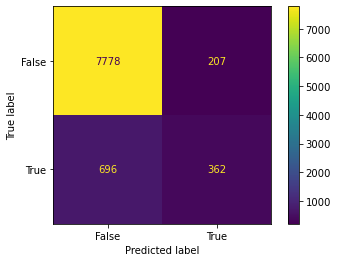

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", grid_search.best_score_)
print("Classification Report:\n", classification_rep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Feature Importance Assessment
#### Coefficient Magnitudes: In logistic regression, the coefficients of the model represent the impact of each feature on the log-odds of the binary outcome. Features with larger absolute coefficient values have a greater influence on the outcome

In [18]:
# Get feature coefficients
coefficients = model.coef_[0]

# Sort coefficients by magnitude to assess importance
feature_importance = abs(coefficients)
feature_importance

array([0.00, 0.00, 0.38, 0.35, 0.10, 0.52, 0.10, 0.09, 0.18, 0.12, 0.28,
       0.56, 0.04, 1.23, 0.40, 0.74, 0.18, 0.06, 2.25, 0.39, 0.21, 1.44,
       1.42, 1.06, 1.43, 1.42, 1.62, 1.18, 0.88, 1.44, 1.36, 0.64, 1.24,
       1.32, 0.39, 0.21, 0.02, 0.06, 0.12, 0.46, 0.25, 1.93, 0.06, 0.13,
       1.27, 0.23, 0.11])

#### Feature Importance from Recursive Feature Elimination (RFE): You can use RFE, a technique that recursively removes the least important features and re-fits the model, to rank features by their importance.

In [19]:
from sklearn.feature_selection import RFE
# Use RFE to rank features by importance
rfe = RFE(model, n_features_to_select=1)
rfe.fit(x_train, y_train)
feature_ranking = rfe.ranking_
feature_ranking

array([47, 46, 34, 12, 41, 14, 42, 20, 35, 33, 21, 11, 37,  4, 13, 16, 28,
       40,  2, 22, 29,  5,  3, 32, 18, 17, 15, 31, 45, 19, 24, 10, 30, 27,
        6,  7,  8, 43, 38, 26, 44,  1, 39, 25,  9, 23, 36])

In [20]:
x_test1 = x_test
x_test1.drop(x_test1.columns[[0,1,2]],axis=1)

,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,default_yes,month_apr,month_aug,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log
0,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.353943,-0.464901,0.033731,-0.811596,-0.435061
1,0,1,0,0,0,1,1,0,0,1,...,1,0,0,1,0,3.367438,-0.464901,-0.425208,-0.170094,-0.435061
2,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.112356,-0.464901,-0.002151,-0.811596,-0.435061
3,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0.064959,-0.464901,-1.512344,0.322148,-0.435061
4,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1.839344,-0.464901,2.413680,-0.170094,-0.435061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,1,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,-0.629341,-0.464901,-0.283707,0.322148,-0.435061
9039,1,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,-0.524900,2.672507,-1.136982,-0.170094,1.584341
9040,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0.391482,-0.464901,-0.113487,-0.811596,-0.435061
9041,1,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,-0.593074,-0.464901,-0.168644,2.020132,-0.435061


In [21]:
x_train1 = x_train
x_train1.drop(x_train1.columns[[0,1,2]],axis=1)

,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,default_yes,month_apr,month_aug,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log
0,1,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,-0.645275,-0.454071,-1.728912,4.961712,-0.420772
1,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.538652,-0.454071,0.762074,-0.173538,-0.420772
2,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.369329,-0.454071,-0.972209,2.939376,-0.420772
3,1,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,-0.077591,-0.454071,-1.019112,-0.802554,-0.420772
4,0,1,0,0,0,1,1,0,1,0,...,1,0,0,1,0,-0.393144,-0.454071,0.429922,-0.173538,-0.420772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,1,1,0,0,0,1,1,0,0,0,...,0,1,1,0,0,0.071003,1.884308,-0.808267,-0.802554,1.004270
36164,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.501562,-0.454071,0.024053,-0.173538,-0.420772
36165,1,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.761604,-0.454071,-0.172978,0.309123,-0.420772
36166,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,-0.540371,-0.454071,-1.000132,0.309123,-0.420772


In [22]:
model = LogisticRegression()
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train)
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Evaluate the best model on the test data
y_pred = best_model.predict(x_test1)
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Model Score (Accuracy):", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Score (Accuracy): 0.9028146690889807


In [23]:
# Final Model
model = LogisticRegression(C = 10, max_iter = 200, penalty = 'l1', solver = 'liblinear')
model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)

In [24]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(best_model, x_train1, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.90 0.90 0.91 0.90 0.90 0.90 0.90 0.90 0.91 0.90]
Ten-fold Cross Validation Score= 0.9026


Accuracy: 0.9001437576025655
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



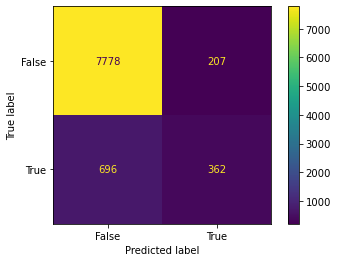

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_rep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Why does the accuracy goes down after feature importance assessment?
#### It's not uncommon for the accuracy to go down after performing feature importance assessment, and there are several reasons why this can happen:

#### Removing Important Features: If you used a method like feature selection or L1 regularization (Lasso) to assess feature importance and subsequently removed some of the features based on their importance, you might have inadvertently removed important predictors from your model. While these methods help identify less important features, they can also eliminate relevant information, leading to reduced model performance.

#### Noise in the Data: Some feature importance assessment methods, especially those based on permutation importance, may be sensitive to noisy or irrelevant features. If you have noisy features that are not truly informative but contribute to accuracy due to overfitting, removing them can lead to a more accurate model in the long run.

#### Overfitting Reduction: High feature dimensionality can lead to overfitting, where the model learns to fit the noise in the training data. Assessing feature importance can help identify and remove features that contribute to overfitting, resulting in a model that generalizes better to unseen data. While this may lead to lower training accuracy, it can improve the model's ability to make accurate predictions on new, unseen data.

#### Collinearity: Feature importance assessment methods can highlight collinear features that provide redundant information. Removing one of the collinear features can reduce multicollinearity in the model, leading to improved model stability and interpretability. However, this may result in a decrease in training accuracy if the collinear feature contributed to model fit.

#### Feature Engineering: Feature importance assessment may inspire further feature engineering efforts. After identifying important features, you might explore interactions, transformations, or new features based on the insights gained. These changes can initially reduce accuracy during the process but lead to a better-performing model in the end.

#### Model Choice and Hyperparameters: Feature importance assessments can provide insights into which features are truly relevant for your problem. This information might lead to adjustments in the choice of the machine learning algorithm or hyperparameter tuning, which can temporarily decrease accuracy during the optimization process but lead to better results in the end.

#### In summary, a decrease in accuracy after feature importance assessment is not necessarily a bad thing. It's essential to consider the broader context, including the potential benefits of a more interpretable and generalizable model. If you observe a significant drop in accuracy, you can revisit your feature selection or removal decisions and fine-tune your model and feature engineering to strike a better balance between simplicity and predictive power.